In [1]:
import pickle
import pandas as pd
import math
import os
import numpy as np
from itertools import product
import cv2
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.python.ops.variables import Variable
from tensorflow.contrib.layers import flatten

import helpers as h

#---------------------------------------------
# Training parameters
#---------------------------------------------
training_file = 'data/train.p'
testing_file = 'data/test.p'
features_count = 32 * 32
batch_size=100
epochs = 2000
learning_rate = 0.0001
early_stopping_rounds = 10
dropout_probability = 0.2
TRAIN_DIR = 'logs/'

#---------------------------------------------
# Load data
#---------------------------------------------
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

n_train = len(X_train)
n_test = len(X_test)
image_shape = X_train.shape[1]
n_classes = len(set(y_train))

In [2]:
X_train.shape

(39209, 32, 32, 3)

<module 'matplotlib.pyplot' from '/home/mattwg/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

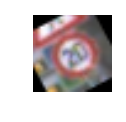

In [3]:
#---------------------------------------------
# Balance classes - 5000 of each image
#---------------------------------------------
%matplotlib inline
img = X_train[1,:,:, :]

h.plot_image(h.random_rotate(img), 1, 1)

In [20]:
## Generate 2500 of each class
## for each class
X_train_balanced = np.empty([2500*43, 32, 32, 3], dtype=np.uint8)
y_train_balanced = np.empty([2500*43])
indices = np.arange(0,len(X_train))
start_idx = 0
for c in range(0,n_classes):
    bidx = (y_train == c)
    class_indices = indices[bidx]
    n_imgs = len(class_indices)
    n_new_imgs = 2500 - n_imgs
    end_idx = start_idx + n_imgs
    #print(c, n_imgs, n_new_imgs, start_idx, end_idx, end_idx + n_new_imgs)
    # copy old images over
    X_train_balanced[start_idx:end_idx,:,:,:] = X_train[class_indices,:,:,:]
    y_train_balanced[start_idx:end_idx] = y_train[class_indices]
    # sample remaining images
    new_idx = np.random.choice(class_indices,n_new_imgs)
    for i, j in enumerate(new_idx):
        X_train_balanced[end_idx+i,:,:,:] = h.random_rotate(X_train[j,:,:,:])
        y_train_balanced[end_idx+i] = y_train[j
                                                   ]
    start_idx = start_idx + 2500
                                                                
                                                                
X_train_balanced.shape

#for c in range(0,n_classes):
#    print(len(y_train_balanced[(y_train_balanced == c)]))   

(107500, 32, 32, 3)

<module 'matplotlib.pyplot' from '/home/mattwg/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

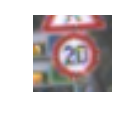

In [21]:
h.plot_image(X_train_balanced[1,:,:,:],1,1)

75

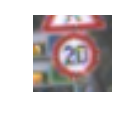

In [22]:
h.plot_image(X_train[1,:,:,:],1,1)
X_train[0,0,0,0]